In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 225.0, test_images / 225.0

In [5]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
    ]
    

In [6]:
model_path = "cifar10_cnn_model.h5"
if os.path.exists(model_path):
    #load the model if it exists
    model = tf.keras.load_model(model_path)
    print("Model loaded from disk")
else:
    #Build and train model if it doesn't exist
    model = models.Sequential(
        [
            layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation="relu"),
            layers.Flatten(),
            layers.Dense(64, activation="relu"),
            layers.Dense(10),
        ]
    )

C:\Users\fahad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
    

In [8]:
model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3268 - loss: 1.8217 - val_accuracy: 0.5336 - val_loss: 1.2870
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5692 - loss: 1.2167 - val_accuracy: 0.6250 - val_loss: 1.0675
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6388 - loss: 1.0279 - val_accuracy: 0.6371 - val_loss: 1.0107
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6741 - loss: 0.9269 - val_accuracy: 0.6548 - val_loss: 0.9736
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7045 - loss: 0.8514 - val_accuracy: 0.6756 - val_loss: 0.9362
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7242 - loss: 0.7827 - val_accuracy: 0.7001 - val_loss: 0.8746
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7453 - loss: 0.7287 - val_accuracy: 0.6892 - val_loss: 0.9028
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7595 -

In [9]:
#Save the model
model.save(model_path)
print("Model saved to disk.")

Model saved to disk.


In [11]:
def classify_image(image):
    img_array = tf.expand_dims(image, 0) #Creates batch
    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()
    return class_names[predicted_class]


In [12]:
#Display the image with its predicted class
def show_image_with_prediction(image, true_label):
    predicted_label = classify_image(image)
    plt.figure()
    plt.imshow(image)
    plt.title(f"predicted: {predicted_label}, True: {true_label}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


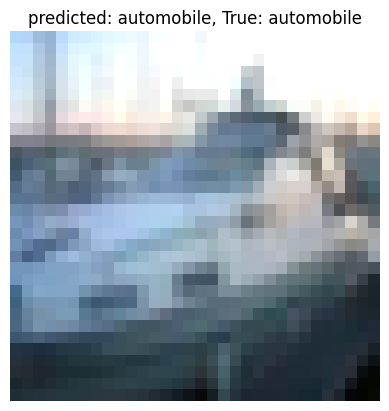

In [13]:
class_pred = classify_image(test_images[2])
show_image_with_prediction(test_images[2], class_pred)